In [1]:
import pandas as pd

data=pd.read_csv("C:\\Users\\Jayasri\\Downloads\\archive (5)\\Sample_ Superstore.csv")

data.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11-08-2016,11-11-2016,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11-08-2016,11-11-2016,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,06-12-2016,6/16/2016,Second Class,DV-13045,Corporate,United States,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10-11-2015,10/18/2015,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10-11-2015,10/18/2015,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [2]:
print(data.isnull().sum())

# Drop duplicates if any
data.drop_duplicates(inplace=True)

# Quick summary
data.describe()

Row ID          0
Order ID        0
Order Date      0
Ship Date       0
Ship Mode       0
Customer ID     0
Segment         0
Country         0
City            0
State           0
Region          0
Product ID      0
Category        0
Sub-Category    0
Product Name    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64


,Row ID,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,229.858001,3.789574,0.156203,28.656896
std,2885.163629,623.245101,2.225110,0.206452,234.260108
min,1.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,22638.480000,14.000000,0.800000,8399.976000


In [3]:
%pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


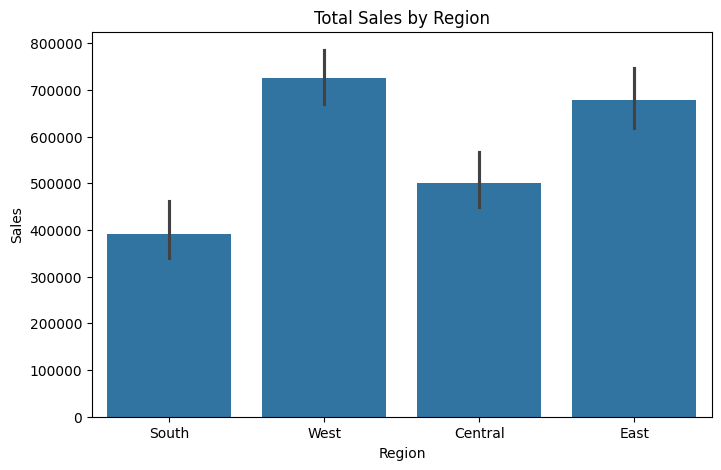

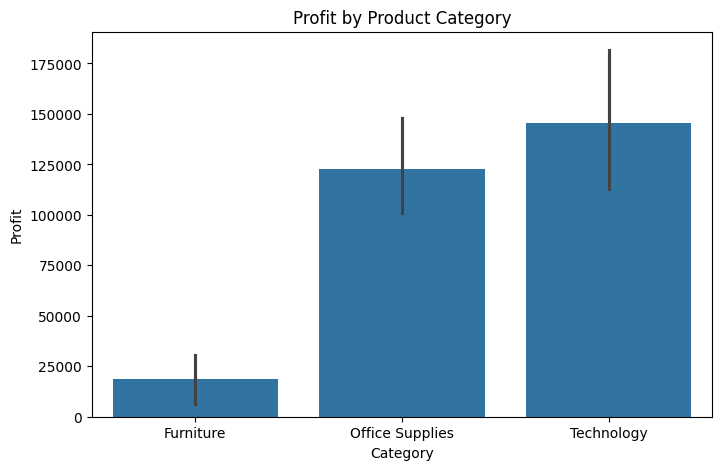

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Total Sales by Region
plt.figure(figsize=(8,5))
sns.barplot(x='Region', y='Sales', data=data, estimator=sum)
plt.title("Total Sales by Region")
plt.show()

# Profit by Category
plt.figure(figsize=(8,5))
sns.barplot(x='Category', y='Profit', data=data, estimator=sum)
plt.title("Profit by Product Category")
plt.show()

In [5]:
# Encode categorical variables
data_encoded = pd.get_dummies(data[['Category','Sub-Category','Region','Quantity']], drop_first=True)
y = data['Sales']  # Target

X = data_encoded

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse:.2f}, R² Score: {r2:.2f}")

MSE: 481458.87, R² Score: 0.18


In [8]:
print("Business Insights:")
print("- Technology and Office Supplies categories generate highest profit, focus inventory accordingly.")
print("- Western region has highest sales, consider promotions in lower-performing regions.")
print("- Regression model can forecast future sales to optimize stock and staffing.")

Business Insights:
- Technology and Office Supplies categories generate highest profit, focus inventory accordingly.
- Western region has highest sales, consider promotions in lower-performing regions.
- Regression model can forecast future sales to optimize stock and staffing.


In [9]:
%pip install pickle5

Defaulting to user installation because normal site-packages is not writeable
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Failed to build pickle5
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  exit code: 1
  
  [96 lines of output]
  C:\Users\Jayasri\AppData\Local\Temp\pip-build-env-l30gpl4a\overlay\Lib\site-packages\setuptools\dist.py:759: SetuptoolsDeprecationWarning: License classifiers are deprecated.
  !!
  
          ********************************************************************************
          Please consider removing the following classifiers in favor of a SPDX license expression:
  
          License :: OSI Approved :: Python Software Foundation License
  
          See https://packaging.python.org/en/latest/guides/writing-pyproject-toml/#license for details.
          ********************************************************************************
  
  !!
    self._finalize_license_expression()
  running bdist_wheel
  running build
  running build_py
  creating build\lib.win-amd64-cpython-314\pickle5
  copying pickle5\pickle.py -> build\lib.win-amd64-cpython-314\pickle5
  copying pickle5\pickletools.py -> build

In [11]:
import pickle

# Save trained model
with open("sales_prediction_model.pkl", "wb") as f:
    pickle.dump(model, f)